# **NoteBook-1. Cleaning data**

**Named Entity Recognition**

Using the provided labelled dataset, train a NER model to recognize Payment term Entity
using any ML/DL framework

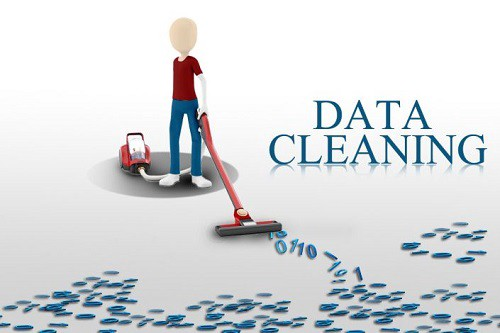

In [ ]:
# import libraries

In [ ]:
import os
import re
import json
import numpy as np
import pandas as pd
from collections import Counter

In [ ]:
data_path = '/content/drive/MyDrive/payment_terms.jsonl'
data_complete = []
for line in open(data_path, 'r'):
    data_complete.append(json.loads(line))

In [ ]:
print(f'Length of total records: {len(data_complete)}')

Length of total records: 89


In [ ]:
print('sample data')
data_complete[:5]

sample data


[{'id': 783,
  'text': "(c)mrbwill pay undisputed amounts within 30 days after receiving Supplier's invoice.",
  'meta': {},
  'annotation_approver': None,
  'labels': [[41, 48, 'Payment Term']]},
 {'id': 784,
  'text': 'MSA Tech Services (9/06}CONFIDENTIAL INFORMATION Supplier must not invoice mrb more than 90 calendar days after Supplier is permitted to issue an invoiceunderthis Agreement(“Late Invoices”)orinitially raise a claim for paymentof a previously issued invoice morethan 6 monthsafter the invoice date (“Late Claims’).',
  'meta': {},
  'annotation_approver': None,
  'labels': []},
 {'id': 785,
  'text': 'Supplier will immediately, but in no event more than 10business days after discovery of an over-billing, reimburse mrbfor any over-billing disclosed by the audit andsimple interest for the period oftime between the date the overpayment was made and the date that mrb wasreimbursedat a rate of 1% per month.',
  'meta': {},
  'annotation_approver': None,
  'labels': []},
 {'id'

In [ ]:
# converted JSON data to DATAFRAME
dataframe = pd.DataFrame(data_complete)
dataframe.head()

,id,text,meta,annotation_approver,labels
0,783,(c)mrbwill pay undisputed amounts within 30 da...,{},None,"[[41, 48, Payment Term]]"
1,784,MSA Tech Services (9/06}CONFIDENTIAL INFORMATI...,{},None,[]
2,785,"Supplier will immediately, but in no event mor...",{},None,[]
3,786,Block will pay the Commission Fees due per the...,{},None,[]
4,787,Payment for services rendered under this Agree...,{},None,"[[71, 87, Payment Term]]"


In [ ]:
# getting records which have only labels
dataframe['labels_Length'] = dataframe['labels'].str.len()
new_df = dataframe[dataframe['labels_Length']!=0][['text','labels']]

In [ ]:
new_df.head()

,text,labels
0,(c)mrbwill pay undisputed amounts within 30 da...,"[[41, 48, Payment Term]]"
4,Payment for services rendered under this Agree...,"[[71, 87, Payment Term]]"
5,The Total Fees shall be due upon the Order For...,"[[184, 200, Payment Term]]"
6,The renewal fees for each Renewal Term shall b...,"[[100, 121, Payment Term]]"
8,mrbshall pay all invoices within thirty (30)da...,"[[33, 48, Payment Term]]"


In [ ]:
new_df['label_postions'] = new_df['labels'].apply(lambda x: x[0][0:2] if isinstance(x, list) else x)

In [ ]:
# cleaning data
def cleanText(document):
  document = re.sub(r"\((.*?)\)", r"\1", document)
  return document.replace('\"','')
def termFun(strat,end):
  return cleanText((strat[end[0]:end[1]+1]))

In [ ]:
new_df['label_data'] = new_df.apply(lambda x: termFun(x['text'],x['label_postions']), axis=1)

In [ ]:
# adding all the daat as PAYEMNT TERM
new_df['term'] = 'Payment Term'

In [ ]:
new_df.head()

,text,labels,label_postions,label_data,term
0,(c)mrbwill pay undisputed amounts within 30 da...,"[[41, 48, Payment Term]]","[41, 48]",30 days,Payment Term
4,Payment for services rendered under this Agree...,"[[71, 87, Payment Term]]","[71, 87]",thirty 30 days,Payment Term
5,The Total Fees shall be due upon the Order For...,"[[184, 200, Payment Term]]","[184, 200]",thirty 30 days,Payment Term
6,The renewal fees for each Renewal Term shall b...,"[[100, 121, Payment Term]]","[100, 121]",“netthirty 30 days”,Payment Term
8,mrbshall pay all invoices within thirty (30)da...,"[[33, 48, Payment Term]]","[33, 48]",thirty 30days,Payment Term


# Unique Payment terms in Corpus

In [ ]:
new_df['label_data'].unique()

array(['30 days ', 'thirty 30 days ', '“netthirty 30 days” ',
       'thirty 30days ', '30 days:', 'thirty days ',
       'forty-five 45 days ', 'forty-five 450 days ', '30 days.',
       'sixty 60 days ', 'NET 30 '], dtype=object)

In [ ]:
new_df[['text','term']].to_csv('paymet_terms_cleaned.csv')

In [ ]:
corpus = ''
for txt_line in new_df['text']:
  corpus += txt_line

In [ ]:
# Retriving most common words in corpus, to train those labels as 'O'
Counter = Counter(corpus.split())
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = dict(Counter.most_common(100))
  
print(list(most_occur.keys()))

['of', 'the', 'days', 'and', 'within', 'in', 'pay', 'thirty', 'invoice', 'shall', 'receipt', '30', '(30)', 'to', 'be', 'will', 'for', 'a', 'undisputed', 'due', 'this', 'following', 'from', 'all', 'are', 'or', 'each', 'as', 'any', 'MetricStream', 'payable', 'net', 'by', 'charges', 'correct', 'such', 'payment', 'date', 'invoices', 'otherwise', 'invoice,', 'dollars', 'terms)', 'promptly', 'notify', 'disputed', 'forty-five', '(45)', 'with', 'Services', 'is', 'after', 'rendered', 'Agreement', 'Customer', 'which', 'fees', 'on', 'SOW,', 'U.S.', 'writing', 'o', 'f', 'specified', 'accordance', 'not', 'per', 'Covered', 'Diplomat', 'submitted', 'claims', 'Provider', 'amounts', 'invoice.Payment', 'services', 'Total', 'Fees', 'upon', 'Order', 'invoiced', 'Term', 'first', '-', 'payments', 'fixed', 'at', 'rates', 'stated,', '(Net', 'paid', 'provided', 'an', 'sixty', '(60)', 'WPS', 'applicable', 'month', 'electronically', 'claim', 'period']


In [ ]:
cmon_wrds_df = pd.DataFrame(list(most_occur.keys()))
cmon_wrds_df['value'] = 'O'

In [ ]:
cmon_wrds_df.to_csv(r'common_words_data.txt', header=None, index=None, sep=' ', mode='a')

In [ ]:
cmon_wrds_df

,0,value
0,of,O
1,the,O
2,days,O
3,and,O
4,within,O
...,...,...
95,applicable,O
96,month,O
97,electronically,O
98,claim,O
